
# Import Library



In [1]:
%matplotlib inline
import os
import random
from skimage import img_as_ubyte
from skimage.util import random_noise
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import numpy as np
import cv2
from glob import glob
from matplotlib import pyplot as plt
from os.path import join

from albumentations import (
    PadIfNeeded,
    HorizontalFlip,
    VerticalFlip,    
    CenterCrop,    
    Crop,
    Compose,
    Transpose,
    RandomRotate90,
    ElasticTransform,
    GridDistortion, 
    OpticalDistortion,
    RandomSizedCrop,
    OneOf,
    CLAHE,
    RandomBrightnessContrast,    
    RandomGamma    
)


# Seting Visualize



In [2]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 20
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(10, 10))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(10, 10))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)


# Read Image and Mask



In [7]:
image = cv2.imread('C:\\Users\\fbichara\\Desktop\\data\\images\\ADE_train_00001024.png')
mask = cv2.imread('C:\\Users\\fbichara\\Desktop\\data\\masks\\ADE_train_00001024.png', 0)

# ORIGINAL IMAGE

In [8]:
print(image.shape, mask.shape)

(864, 1152, 3) (864, 1152)


In [9]:
original_height, original_width = image.shape[:2]

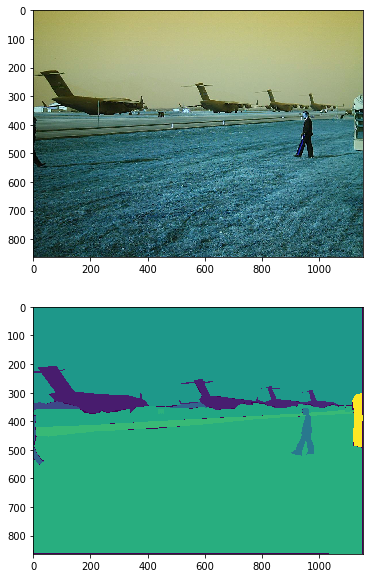

In [10]:
visualize(image, mask)


# Padding



(2048, 2048, 3) (2048, 2048)


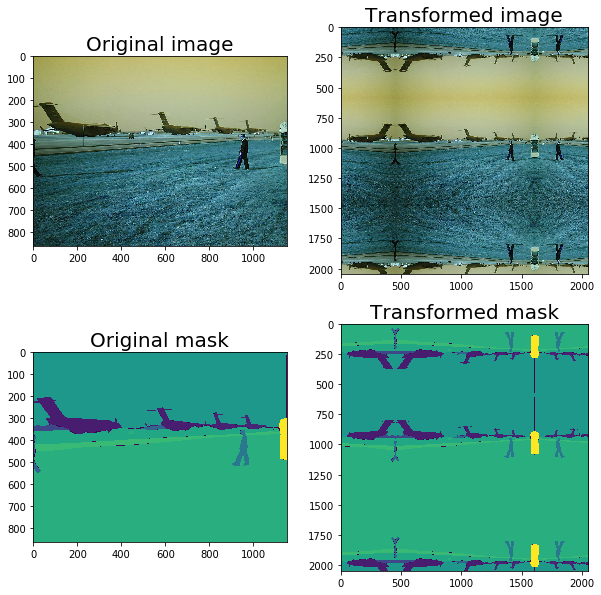

In [14]:
aug = PadIfNeeded(p=1, min_height=2048, min_width=2048)

augmented = aug(image=image, mask=mask)

image_padded = augmented['image']
mask_padded = augmented['mask']

print(image_padded.shape, mask_padded.shape)

visualize(image_padded, mask_padded, original_image=image, original_mask=mask)


# Crop Image



(864, 1152, 3) (864, 1152)


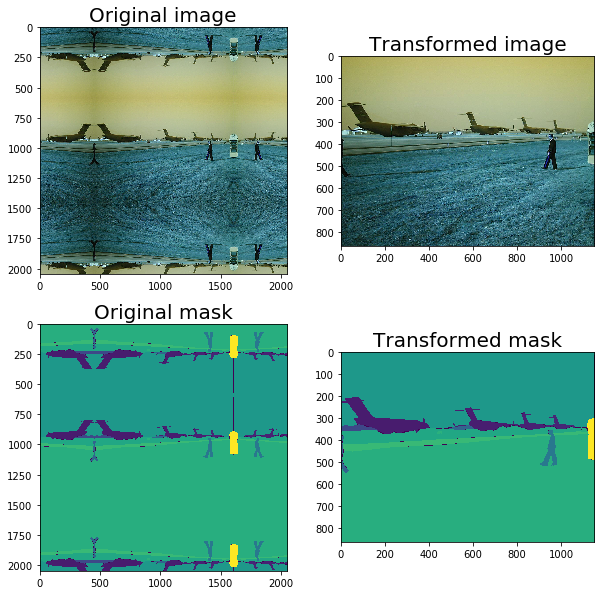

In [15]:
x_min = (2048 - original_width) // 2
y_min = (2048 - original_height) // 2

x_max = x_min + original_width
y_max = y_min + original_height

aug = Crop(p=1, x_min=x_min, x_max=x_max, y_min=y_min, y_max=y_max)

augmented = aug(image=image_padded, mask=mask_padded)

image_cropped = augmented['image']
mask_cropped = augmented['mask']

print(image_cropped.shape, mask_cropped.shape)

assert (image - image_cropped).sum() == 0
assert (mask - mask_cropped).sum() == 0

visualize(image_cropped, mask_cropped, original_image=image_padded, original_mask=mask_padded)


# Horizontal Flip



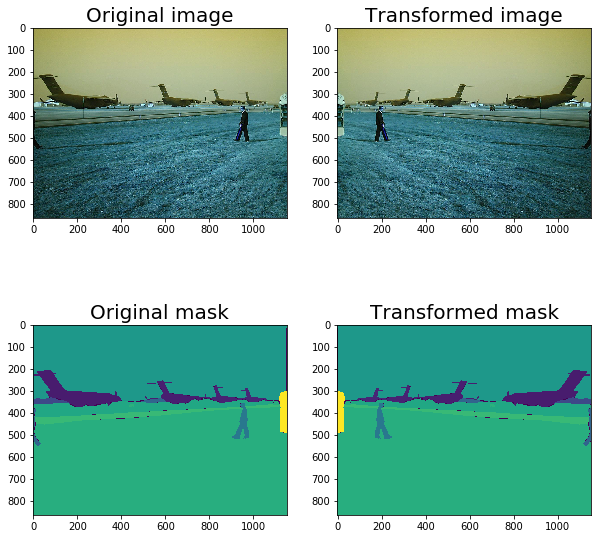

In [16]:
aug = HorizontalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_h_flipped = augmented['image']
mask_h_flipped = augmented['mask']

visualize(image_h_flipped, mask_h_flipped, original_image=image, original_mask=mask)


# Random Rotate 90



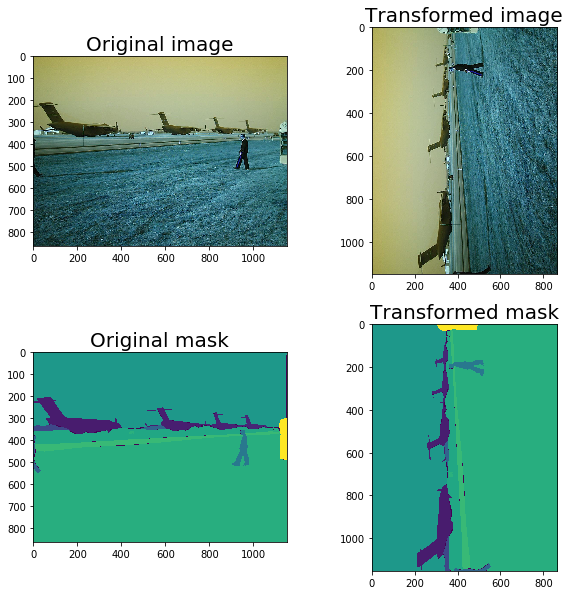

In [17]:
aug = RandomRotate90(p=1)

augmented = aug(image=image, mask=mask)

image_rot90 = augmented['image']
mask_rot90 = augmented['mask']

visualize(image_rot90, mask_rot90, original_image=image, original_mask=mask)


# Transpose



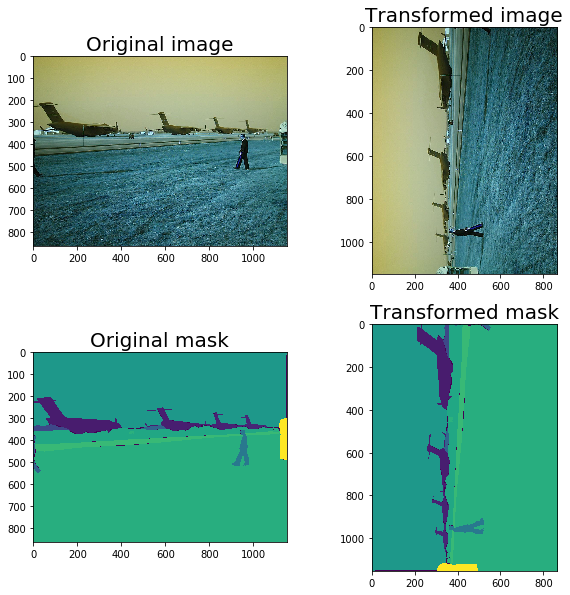

In [18]:
aug = Transpose(p=1)

augmented = aug(image=image, mask=mask)

image_transposed = augmented['image']
mask_transposed = augmented['mask']

visualize(image_transposed, mask_transposed, original_image=image, original_mask=mask)


# Crop Image



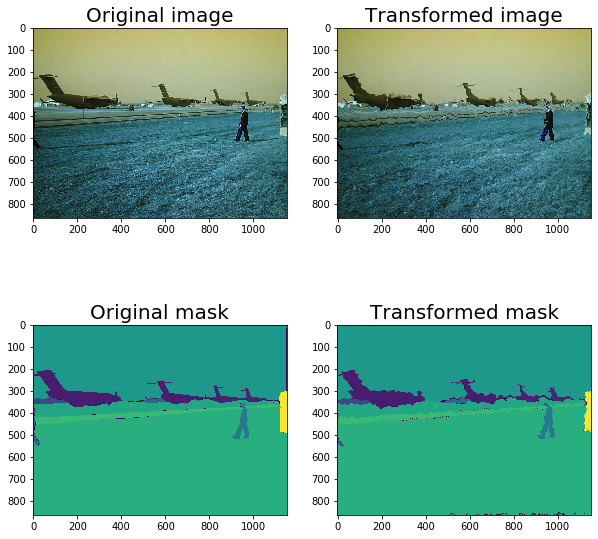

In [19]:
aug = ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03)

augmented = aug(image=image, mask=mask)

image_elastic = augmented['image']
mask_elastic = augmented['mask']

visualize(image_elastic, mask_elastic, original_image=image, original_mask=mask)


# Grid Distortion



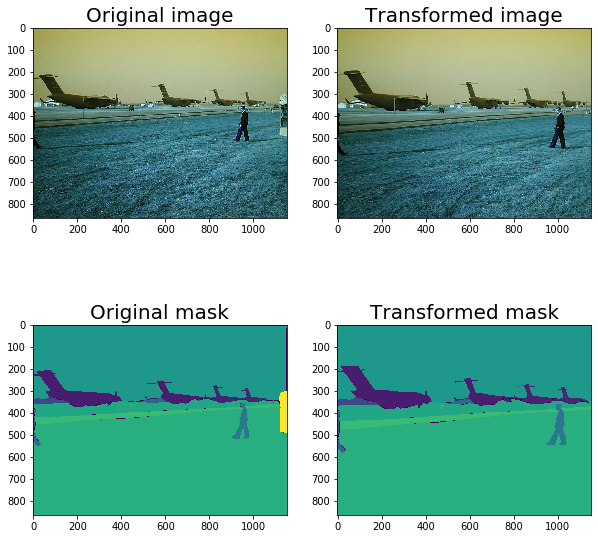

In [20]:
aug = GridDistortion(p=1)

augmented = aug(image=image, mask=mask)

image_grid = augmented['image']
mask_grid = augmented['mask']

visualize(image_grid, mask_grid, original_image=image, original_mask=mask)


# OpticalDistortion



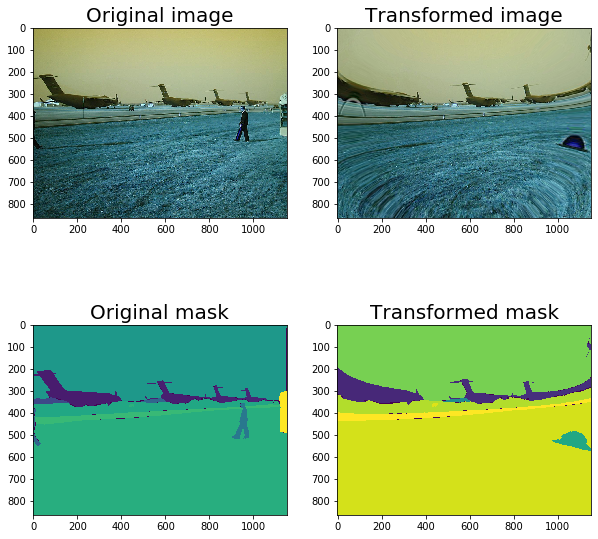

In [21]:

aug = OpticalDistortion(p=1, distort_limit=2, shift_limit=0.5)

augmented = aug(image=image, mask=mask)

image_optical = augmented['image']
mask_optical = augmented['mask']

visualize(image_optical, mask_optical, original_image=image, original_mask=mask)


# Random Sized Crop



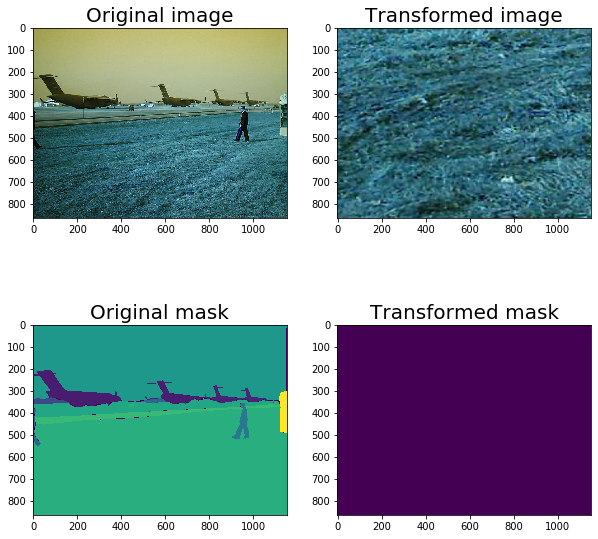

In [22]:
aug = RandomSizedCrop(p=1, min_max_height=(200, 200), height=original_height, width=original_width)

augmented = aug(image=image, mask=mask)

image_scaled = augmented['image']
mask_scaled = augmented['mask']

visualize(image_scaled, mask_scaled, original_image=image, original_mask=mask)

    




# Pipeline Example



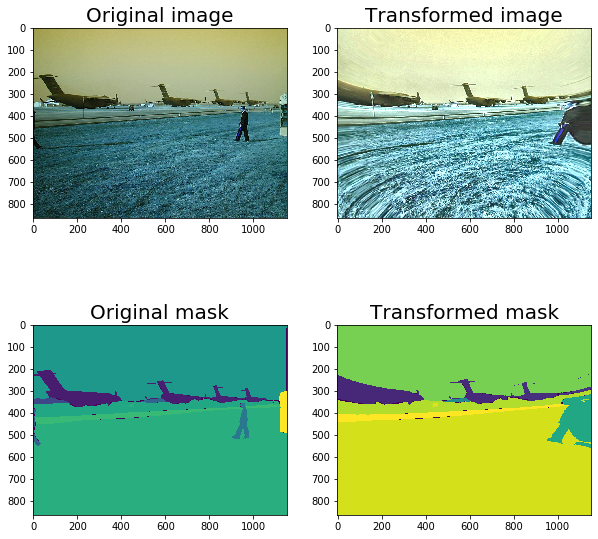

In [23]:
aug = Compose([
    OneOf([RandomSizedCrop(min_max_height=(50, 101), height=original_height, width=original_width, p=0.5),
          PadIfNeeded(min_height=original_height, min_width=original_width, p=0.5)], p=1),    
    VerticalFlip(p=0.5),              
    RandomRotate90(p=0.5),
    OneOf([
        ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
        GridDistortion(p=0.5),
        OpticalDistortion(p=1, distort_limit=2, shift_limit=0.5)                  
        ], p=0.8),
    CLAHE(p=0.8),
    RandomBrightnessContrast(p=0.8),    
    RandomGamma(p=0.8)])

augmented = aug(image=image, mask=mask)

image_heavy = augmented['image']
mask_heavy = augmented['mask']

visualize(image_heavy, mask_heavy, original_image=image, original_mask=mask)